In [75]:
import pydub
import matplotlib.pyplot as plt
from numpy.fft import fft
import numpy as np
%matplotlib inline

In [76]:
song = pydub.AudioSegment.from_wav('Rec/Bom Kiri.wav')
y = np.array(song.get_array_of_samples())

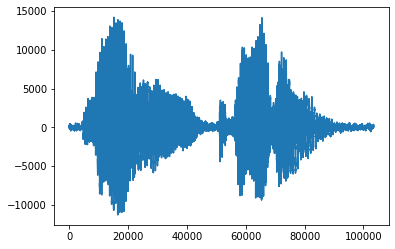

In [77]:
plt.plot(y)
plt.show()

In [78]:
def detect(song, silence_threshold= -50, chunk_size= 10):
    trim_ms = 0 #in ms
    assert chunk_size > 0 #avoid the infinity loop
    while(song[trim_ms:trim_ms+chunk_size].dBFS < silence_threshold and trim_ms < len(song)):
        trim_ms += chunk_size
    return trim_ms


In [79]:
song2 = pydub.AudioSegment.from_wav('Rec/Bom Kiri.wav')
start_trim = detect(song2)
end_trim = detect(song2.reverse())

duration = len(song2)
result = song2[start_trim:duration-end_trim]
result.export('Trim_Bom Kiri.wav', format='wav')
x = np.array(result.get_array_of_samples())

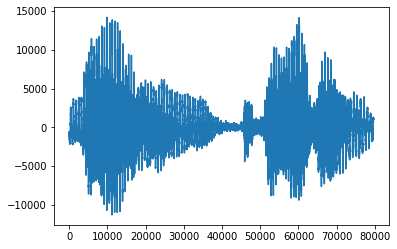

In [80]:
plt.plot(x)
plt.show()